In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Client_ID,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount,Loan_Application_Date,Default_Flag,Type_of_Default
0,1,54549,M,300000.0,12th pass,SALARIED,M,Yes,Red,A,300000,<50L,10.0,1.0,M!,X1,3600,13/04/2004,No,NaN
1,2,109641,M,1475000.0,Graduatee,SALARIED,M,Yes,Red,A,10000000,>=50,30.0,26.0,M2,X2,11866,28/11/2003,No,NaN
2,3,110227,M,500000.0,Graduate,SALARIED,S,Yes,Green,A,10000000,>=50,26.0,22.0,M2,X3,7565,04/01/2004,No,NaN
3,4,104886,M,400000.0,Graduate,SALARIED,M,Yes,Amber,A,2500000,<50L,25.0,21.0,M2,X3,4993,08/09/2004,No,NaN
4,6,90854,M,1500000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,5000000,>=50,25.0,21.0,M2,X1,18914,06/05/2003,No,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397303 entries, 0 to 397302
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Loan_ID                           397303 non-null  int64  
 1   Client_ID                         397303 non-null  int64  
 2   Loanee_Gender                     397301 non-null  object 
 3   Loanee_Annual_Income              397303 non-null  float64
 4   Loanee_Education                  397303 non-null  object 
 5   Loanee_Occupation                 395307 non-null  object 
 6   Loanee_Marital_Status             397303 non-null  object 
 7   Credit_Criteria                   397303 non-null  object 
 8   Loanee_Third_Party_Credit_Rating  397303 non-null  object 
 9   Loan_Type                         397303 non-null  object 
 10  Loan_Amount                       397303 non-null  int64  
 11  Loan_Amount_Category              397303 non-null  o

In [4]:
obj = df.select_dtypes("object").columns
obj

Index(['Loanee_Gender', 'Loanee_Education', 'Loanee_Occupation',
       'Loanee_Marital_Status', 'Credit_Criteria',
       'Loanee_Third_Party_Credit_Rating', 'Loan_Type', 'Loan_Amount_Category',
       'EMI_Payment_Mode', 'Bank_Division', 'Loan_Application_Date',
       'Default_Flag', 'Type_of_Default'],
      dtype='object')

In [5]:
for col in obj:
    print(f"{col} : {df[col].unique()}")

Loanee_Gender : ['M' 'F' nan]
Loanee_Education : ['12th pass' 'Graduatee' 'Graduate' 'Post Grad or Higher' 'Diploma'
 '10th pass' 'GRADUATE' 'less than 10th pass' 'Other']
Loanee_Occupation : ['SALARIED' 'DOCTOR' 'STUDENT' 'RETIRED' 'PUBLIC SERVICE' 'BUSINESS'
 'Others' 'SELF EMPLOYED' nan 'AGRICULTURE' 'HOUSEWIFE']
Loanee_Marital_Status : ['M' 'S' 'D' 'W']
Credit_Criteria : ['Yes' 'No']
Loanee_Third_Party_Credit_Rating : ['Red' 'Green' 'Amber']
Loan_Type : ['A' 'B']
Loan_Amount_Category : ['<50L' '>=50']
EMI_Payment_Mode : ['M!' 'M2' 'M3' 'M4']
Bank_Division : ['X1' 'X2' 'X3' 'X4' 'X5' 'X6' 'X7' 'X8' 'X9' 'X10']
Loan_Application_Date : ['13/04/2004' '28/11/2003' '04/01/2004' ... '05/10/2001' '03/04/2002'
 '14/03/2001']
Default_Flag : ['No' 'Yes']
Type_of_Default : [nan 'Type 1' 'Type 2' 'Type 3' 'Type 4' 'Type 5' 'Type 6' 'Type 7'
 'Type 8' 'Type 9' 'Type 10']


<AxesSubplot:xlabel='Client_ID', ylabel='Past_year_overdue'>

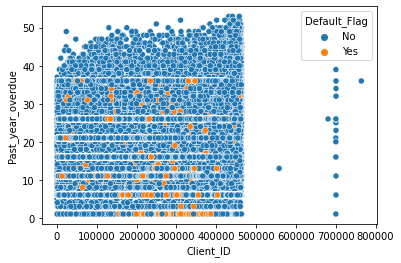

In [6]:
sns.scatterplot(x="Client_ID",y="Past_year_overdue",data=df,hue="Default_Flag")

In the Above Scatter plot it can be seen that the Past year Overdues doesn't directly effect the Default Flag,as many defaulters have 0 past year overdue and non defaulter has past year overdue

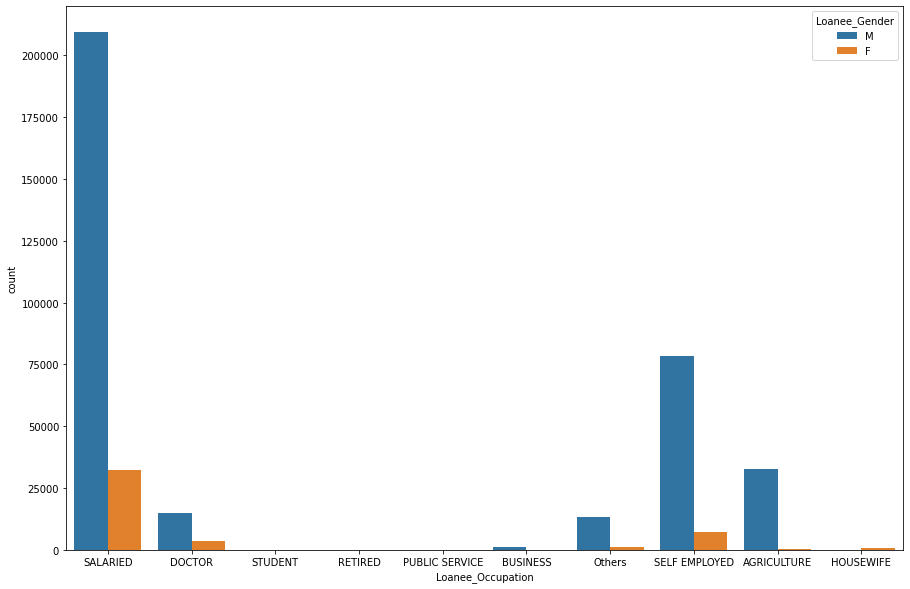

In [7]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x="Loanee_Occupation", hue="Loanee_Gender")
plt.show()

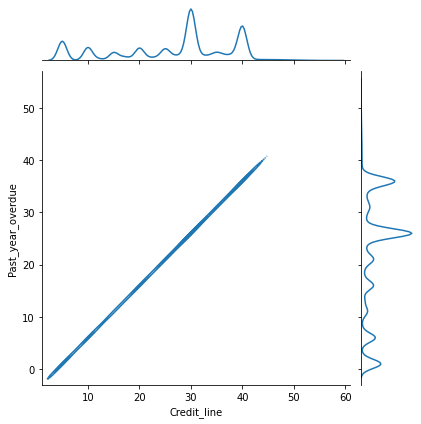

In [8]:
sns.jointplot(data=df,x="Credit_line", y = "Past_year_overdue",kind="kde")

In [9]:
df.describe()

,Loan_ID,Client_ID,Loanee_Annual_Income,Loan_Amount,Credit_line,Past_year_overdue,EMI_Amount
count,397303.000000,397303.000000,3.973030e+05,3.973030e+05,397181.000000,397181.000000,3.973030e+05
mean,270273.350375,242749.346813,-1.371183e+06,5.965406e+06,26.601486,22.454727,1.096141e+04
std,239857.150729,127297.242938,1.586849e+09,6.851910e+06,11.402733,11.484180,1.380287e+04
min,1.000000,100.000000,-1.000000e+12,3.500000e+04,5.000000,1.000000,1.159000e+03
25%,100720.500000,142897.000000,3.200000e+05,2.500000e+06,20.000000,16.000000,5.040000e+03
50%,201356.000000,246670.000000,5.000000e+05,5.000000e+06,30.000000,26.000000,8.160000e+03
75%,301902.500000,350158.500000,1.000000e+06,8.000000e+06,35.000000,31.000000,1.307600e+04
max,780594.000000,764088.000000,9.410675e+09,5.000000e+08,57.000000,53.000000,2.773698e+06


In [10]:
df["Loanee_Education"].value_counts()

Graduate               218025
Post Grad or Higher    109183
12th pass               28959
10th pass               17211
less than 10th pass     15555
Diploma                  8281
Other                      85
Graduatee                   2
GRADUATE                    2
Name: Loanee_Education, dtype: int64

In [11]:
df["Loanee_Education"] = np.where(df["Loanee_Education"] == "Graduatee", "Graduate",df["Loanee_Education"])
df["Loanee_Education"] = np.where(df["Loanee_Education"] == "GRADUATE", "Graduate",df["Loanee_Education"])
df["Loanee_Education"].value_counts()

Graduate               218029
Post Grad or Higher    109183
12th pass               28959
10th pass               17211
less than 10th pass     15555
Diploma                  8281
Other                      85
Name: Loanee_Education, dtype: int64

- Combined "Graduate" ,"graduatee" ,"GRADUATE"

In [12]:
df["Loan_Application_Date"] = pd.to_datetime(df["Loan_Application_Date"])

<AxesSubplot:>

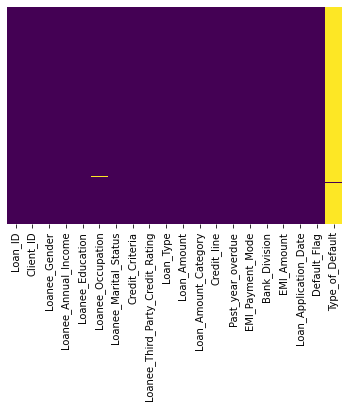

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap="viridis")

In [14]:
df.isnull().sum()

Loan_ID                                  0
Client_ID                                0
Loanee_Gender                            2
Loanee_Annual_Income                     0
Loanee_Education                         0
Loanee_Occupation                     1996
Loanee_Marital_Status                    0
Credit_Criteria                          0
Loanee_Third_Party_Credit_Rating         0
Loan_Type                                0
Loan_Amount                              0
Loan_Amount_Category                     0
Credit_line                            122
Past_year_overdue                      122
EMI_Payment_Mode                         0
Bank_Division                            0
EMI_Amount                               0
Loan_Application_Date                    0
Default_Flag                             0
Type_of_Default                     396590
dtype: int64

<AxesSubplot:>

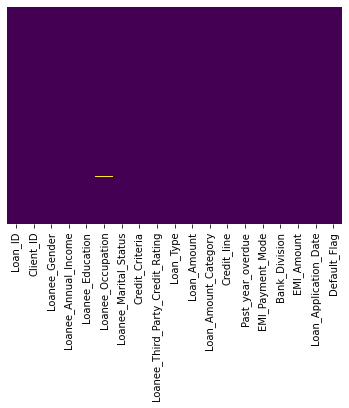

In [15]:
df.drop("Type_of_Default",axis=1,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap="viridis")

In [16]:
from sklearn.impute import SimpleImputer
si= SimpleImputer(missing_values =np.nan,strategy="most_frequent")

In [17]:
df[["Loanee_Occupation"]] = si.fit_transform(df[["Loanee_Occupation"]])

In [18]:
df=df.dropna()
df.reset_index(inplace = True, drop = True)

In [19]:
df.isnull().sum()

Loan_ID                             0
Client_ID                           0
Loanee_Gender                       0
Loanee_Annual_Income                0
Loanee_Education                    0
Loanee_Occupation                   0
Loanee_Marital_Status               0
Credit_Criteria                     0
Loanee_Third_Party_Credit_Rating    0
Loan_Type                           0
Loan_Amount                         0
Loan_Amount_Category                0
Credit_line                         0
Past_year_overdue                   0
EMI_Payment_Mode                    0
Bank_Division                       0
EMI_Amount                          0
Loan_Application_Date               0
Default_Flag                        0
dtype: int64

In [20]:
x = df.drop(["Loan_ID","Client_ID","Loan_Application_Date","Default_Flag"],axis=1)
y = df.iloc[:, -1]
x.head()

,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount
0,M,300000.0,12th pass,SALARIED,M,Yes,Red,A,300000,<50L,10.0,1.0,M!,X1,3600
1,M,1475000.0,Graduate,SALARIED,M,Yes,Red,A,10000000,>=50,30.0,26.0,M2,X2,11866
2,M,500000.0,Graduate,SALARIED,S,Yes,Green,A,10000000,>=50,26.0,22.0,M2,X3,7565
3,M,400000.0,Graduate,SALARIED,M,Yes,Amber,A,2500000,<50L,25.0,21.0,M2,X3,4993
4,M,1500000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,5000000,>=50,25.0,21.0,M2,X1,18914


### Converting Categorical Data using Ordinal Encoder

In [21]:
from sklearn.preprocessing import OrdinalEncoder
oe =OrdinalEncoder()

In [22]:
x[x.select_dtypes("object").columns] = oe.fit_transform(x[x.select_dtypes("object").columns])
x.head()

,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount
0,1.0,300000.0,1.0,7.0,1.0,1.0,2.0,0.0,300000,0.0,10.0,1.0,0.0,0.0,3600
1,1.0,1475000.0,3.0,7.0,1.0,1.0,2.0,0.0,10000000,1.0,30.0,26.0,1.0,2.0,11866
2,1.0,500000.0,3.0,7.0,2.0,1.0,1.0,0.0,10000000,1.0,26.0,22.0,1.0,3.0,7565
3,1.0,400000.0,3.0,7.0,1.0,1.0,0.0,0.0,2500000,0.0,25.0,21.0,1.0,3.0,4993
4,1.0,1500000.0,5.0,7.0,1.0,1.0,2.0,0.0,5000000,1.0,25.0,21.0,1.0,0.0,18914


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y =  le.fit_transform(y)
y = pd.Series(y)
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [24]:
y.value_counts()

0    396465
1       714
dtype: int64

The Classes in the Target Column is imbalance

### OverSampling

In [25]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 1 , sampling_strategy=0.6)

In [26]:
x_sm,y_sm = smk.fit_resample(x,y)

In [27]:
print(f"{x_sm.shape}\n{y_sm.shape}")

(621732, 15)
(621732,)


### Data Scaling 

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sm.iloc[:,:] = sc.fit_transform(x_sm.iloc[:,:])

In [29]:
x_sm.head()

,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount
0,0.345012,0.000779,-1.409781,0.399629,-0.490927,0.265629,1.238475,-0.589052,-0.775424,-1.017946,-1.216391,-1.626570,-2.349653,-2.326120,-0.593656
1,0.345012,0.001706,-0.088122,0.399629,-0.490927,0.265629,1.238475,-0.589052,0.853674,0.984251,0.516035,0.525844,0.156516,-1.044711,0.109159
2,0.345012,0.000937,-0.088122,0.399629,2.105152,0.265629,-0.508031,-0.589052,0.853674,0.984251,0.169550,0.181458,0.156516,-0.404007,-0.256532
3,0.345012,0.000858,-0.088122,0.399629,-0.490927,0.265629,-2.254537,-0.589052,-0.405938,-1.017946,0.082928,0.095361,0.156516,-0.404007,-0.475216
4,0.345012,0.001725,1.233537,0.399629,-0.490927,0.265629,1.238475,-0.589052,0.013933,0.984251,0.082928,0.095361,0.156516,-2.326120,0.708414


In [30]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x_sm,y_sm,test_size=0.25,random_state = 1 , stratify = y_sm)

In [31]:
def mymodel(model):
    #model creation
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    #checking bias & Variance
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    
    #model evaluation
    print(f"{confusion_matrix(ytest,ypred)}\n{classification_report(ytest,ypred)}")
    return model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [33]:
logreg = mymodel(LogisticRegression())

Training Accuracy : 0.7187727187920198
Testing Accuracy : 0.7183995676593774


[[80440 17100]
 [26670 31223]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.79     97540
           1       0.65      0.54      0.59     57893

    accuracy                           0.72    155433
   macro avg       0.70      0.68      0.69    155433
weighted avg       0.71      0.72      0.71    155433



In [34]:
rf = mymodel(RandomForestClassifier())

Training Accuracy : 0.9998177135271574
Testing Accuracy : 0.9985845991520462


[[97523    17]
 [  203 57690]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     97540
           1       1.00      1.00      1.00     57893

    accuracy                           1.00    155433
   macro avg       1.00      1.00      1.00    155433
weighted avg       1.00      1.00      1.00    155433



## Test File

In [35]:
test = pd.read_csv("test.csv")
test.head()

,Loan_ID,Client_ID,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount,Loan_Application_Date
0,329120,110551,M,400000.0,Graduate,SALARIED,M,Yes,Green,A,1500000,<50L,10,6,M2,X4,14874,06/08/2005
1,329121,19105,M,600000.0,Graduate,SALARIED,S,No,Green,A,1500000,<50L,29,25,M!,X3,15816,27/06/2005
2,329122,90521,M,414000.0,Post Grad or Higher,SALARIED,S,Yes,Green,A,5000000,>=50,27,23,M3,X3,7710,21/06/2006
3,329123,25177,M,1500000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,10000000,>=50,28,24,M2,X5,13259,24/07/2005
4,329124,127806,M,600000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,5000000,>=50,20,16,M2,X3,9170,11/09/2005


In [36]:
for col in test.select_dtypes("object").columns:
    print(f"{col} : {test[col].unique()}")

Loanee_Gender : ['M' 'F' nan]
Loanee_Education : ['Graduate' 'Post Grad or Higher' '12th pass' 'Diploma' '10th pass'
 'less than 10th pass' 'Other' 'Graduatee']
Loanee_Occupation : ['SALARIED' 'DOCTOR' 'RETIRED' 'STUDENT' 'PUBLIC SERVICE' 'SELF EMPLOYED'
 'BUSINESS' 'Others' nan 'NGO' 'AGRICULTURE' 'HOUSEWIFE']
Loanee_Marital_Status : ['M' 'S' 'D' 'W']
Credit_Criteria : ['Yes' 'No']
Loanee_Third_Party_Credit_Rating : ['Green' 'Red' 'Amber']
Loan_Type : ['A' 'B']
Loan_Amount_Category : ['<50L' '>=50']
EMI_Payment_Mode : ['M2' 'M!' 'M3' 'M4']
Bank_Division : ['X4' 'X3' 'X5' 'X7' 'X1' 'X6' 'X2' 'X8' 'X9']
Loan_Application_Date : ['06/08/2005' '27/06/2005' '21/06/2006' '24/07/2005' '11/09/2005'
 '16/08/2005' '09/05/2005' '13/03/2006' '16/10/2006' '20/09/2006'
 '15/05/2005' '24/04/2005' '22/05/2005' '28/11/2005' '12/04/2006'
 '11/07/2005' '12/07/2005' '16/02/2006' '30/08/2006' '07/08/2005'
 '23/10/2005' '11/03/2006' '19/04/2005' '30/10/2005' '06/10/2005'
 '08/08/2005' '16/07/2006' '09/10/20

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398564 entries, 0 to 398563
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Loan_ID                           398564 non-null  int64  
 1   Client_ID                         398564 non-null  int64  
 2   Loanee_Gender                     398561 non-null  object 
 3   Loanee_Annual_Income              398564 non-null  float64
 4   Loanee_Education                  398564 non-null  object 
 5   Loanee_Occupation                 364584 non-null  object 
 6   Loanee_Marital_Status             398564 non-null  object 
 7   Credit_Criteria                   398564 non-null  object 
 8   Loanee_Third_Party_Credit_Rating  398564 non-null  object 
 9   Loan_Type                         398564 non-null  object 
 10  Loan_Amount                       398564 non-null  int64  
 11  Loan_Amount_Category              398564 non-null  o

In [38]:
test["Loan_Application_Date"] = pd.to_datetime(test["Loan_Application_Date"])

In [39]:
test["Loanee_Education"].value_counts()

Graduate               264215
Post Grad or Higher     99703
12th pass               21115
Diploma                  8630
10th pass                3792
less than 10th pass      1078
Other                      26
Graduatee                   5
Name: Loanee_Education, dtype: int64

In [40]:
test["Loanee_Education"] = np.where(test["Loanee_Education"] == "Graduatee", "Graduate",test["Loanee_Education"])
test["Loanee_Education"].value_counts()

Graduate               264220
Post Grad or Higher     99703
12th pass               21115
Diploma                  8630
10th pass                3792
less than 10th pass      1078
Other                      26
Name: Loanee_Education, dtype: int64

In [41]:
test["Loanee_Occupation"].value_counts()

SALARIED          232063
SELF EMPLOYED      99992
DOCTOR             17670
Others             10399
AGRICULTURE         2526
HOUSEWIFE           1616
BUSINESS             151
STUDENT               84
RETIRED               73
PUBLIC SERVICE         9
NGO                    1
Name: Loanee_Occupation, dtype: int64

In [42]:
test["Loanee_Occupation"] = np.where(test["Loanee_Occupation"] == "NGO", "Others",test["Loanee_Occupation"])
test["Loanee_Occupation"].value_counts()

SALARIED          232063
SELF EMPLOYED      99992
DOCTOR             17670
Others             10400
AGRICULTURE         2526
HOUSEWIFE           1616
BUSINESS             151
STUDENT               84
RETIRED               73
PUBLIC SERVICE         9
Name: Loanee_Occupation, dtype: int64

#### Replacing NAN values

In [43]:
test[["Loanee_Gender","Loanee_Occupation"]] = si.fit_transform(test[["Loanee_Gender","Loanee_Occupation"]])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398564 entries, 0 to 398563
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Loan_ID                           398564 non-null  int64         
 1   Client_ID                         398564 non-null  int64         
 2   Loanee_Gender                     398564 non-null  object        
 3   Loanee_Annual_Income              398564 non-null  float64       
 4   Loanee_Education                  398564 non-null  object        
 5   Loanee_Occupation                 398564 non-null  object        
 6   Loanee_Marital_Status             398564 non-null  object        
 7   Credit_Criteria                   398564 non-null  object        
 8   Loanee_Third_Party_Credit_Rating  398564 non-null  object        
 9   Loan_Type                         398564 non-null  object        
 10  Loan_Amount                     

In [44]:
scale_test = test.iloc[:,2:-1]
scale_test.head()

,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount
0,M,400000.0,Graduate,SALARIED,M,Yes,Green,A,1500000,<50L,10,6,M2,X4,14874
1,M,600000.0,Graduate,SALARIED,S,No,Green,A,1500000,<50L,29,25,M!,X3,15816
2,M,414000.0,Post Grad or Higher,SALARIED,S,Yes,Green,A,5000000,>=50,27,23,M3,X3,7710
3,M,1500000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,10000000,>=50,28,24,M2,X5,13259
4,M,600000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,5000000,>=50,20,16,M2,X3,9170


#### Encoding

In [45]:
scale_test[scale_test.select_dtypes("object").columns] = oe.transform(scale_test[scale_test.select_dtypes("object").columns])
scale_test.head()

,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount
0,1.0,400000.0,3.0,7.0,1.0,1.0,1.0,0.0,1500000,0.0,10,6,1.0,4.0,14874
1,1.0,600000.0,3.0,7.0,2.0,0.0,1.0,0.0,1500000,0.0,29,25,0.0,3.0,15816
2,1.0,414000.0,5.0,7.0,2.0,1.0,1.0,0.0,5000000,1.0,27,23,2.0,3.0,7710
3,1.0,1500000.0,5.0,7.0,1.0,1.0,2.0,0.0,10000000,1.0,28,24,1.0,5.0,13259
4,1.0,600000.0,5.0,7.0,1.0,1.0,2.0,0.0,5000000,1.0,20,16,1.0,3.0,9170


In [46]:
scale_test.iloc[:,:] = sc.transform(scale_test.iloc[:,:])
scale_test.head()

,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount
0,0.345012,0.000858,-0.088122,0.399629,-0.490927,0.265629,-0.508031,-0.589052,-0.573886,-1.017946,-1.216391,-1.196088,0.156516,0.236697,0.364914
1,0.345012,0.001016,-0.088122,0.399629,2.105152,-4.245504,-0.508031,-0.589052,-0.573886,-1.017946,0.429414,0.439747,-2.349653,-0.404007,0.445007
2,0.345012,0.000869,1.233537,0.399629,2.105152,0.265629,-0.508031,-0.589052,0.013933,0.984251,0.256171,0.267554,2.662686,-0.404007,-0.244204
3,0.345012,0.001725,1.233537,0.399629,-0.490927,0.265629,1.238475,-0.589052,0.853674,0.984251,0.342792,0.353651,0.156516,0.877401,0.227599
4,0.345012,0.001016,1.233537,0.399629,-0.490927,0.265629,1.238475,-0.589052,0.013933,0.984251,-0.350178,-0.335122,0.156516,-0.404007,-0.120068


In [47]:
testpred = rf.predict(scale_test)
testpred

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
test["Default_Flag_Prediction"] = testpred

In [51]:
test.head()

,Loan_ID,Client_ID,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount,Loan_Application_Date,Default_Flag_Prediction
0,329120,110551,M,400000.0,Graduate,SALARIED,M,Yes,Green,A,1500000,<50L,10,6,M2,X4,14874,2005-06-08,0
1,329121,19105,M,600000.0,Graduate,SALARIED,S,No,Green,A,1500000,<50L,29,25,M!,X3,15816,2005-06-27,0
2,329122,90521,M,414000.0,Post Grad or Higher,SALARIED,S,Yes,Green,A,5000000,>=50,27,23,M3,X3,7710,2006-06-21,0
3,329123,25177,M,1500000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,10000000,>=50,28,24,M2,X5,13259,2005-07-24,0
4,329124,127806,M,600000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,5000000,>=50,20,16,M2,X3,9170,2005-11-09,0


In [52]:
test["Default_Flag_Prediction"].value_counts()

0    398429
1       135
Name: Default_Flag_Prediction, dtype: int64

In [53]:
test["Default_Flag_Prediction"] = np.where(test["Default_Flag_Prediction"] == 1, "Yes","No")
test.head()

,Loan_ID,Client_ID,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount,Loan_Application_Date,Default_Flag_Prediction
0,329120,110551,M,400000.0,Graduate,SALARIED,M,Yes,Green,A,1500000,<50L,10,6,M2,X4,14874,2005-06-08,No
1,329121,19105,M,600000.0,Graduate,SALARIED,S,No,Green,A,1500000,<50L,29,25,M!,X3,15816,2005-06-27,No
2,329122,90521,M,414000.0,Post Grad or Higher,SALARIED,S,Yes,Green,A,5000000,>=50,27,23,M3,X3,7710,2006-06-21,No
3,329123,25177,M,1500000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,10000000,>=50,28,24,M2,X5,13259,2005-07-24,No
4,329124,127806,M,600000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,5000000,>=50,20,16,M2,X3,9170,2005-11-09,No


### Defaulter List

In [64]:
defaultlist = test[test["Default_Flag_Prediction"] == "Yes"]
defaultlist.reset_index(inplace = True, drop = True)
defaultlist.head()

,Loan_ID,Client_ID,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount,Loan_Application_Date,Default_Flag_Prediction
0,569085,453903,M,300000.0,Diploma,SELF EMPLOYED,M,Yes,Red,A,2500000,<50L,39,35,M2,X4,8289,2005-04-17,Yes
1,576684,496987,M,300000.0,Graduate,SELF EMPLOYED,M,Yes,Red,A,2500000,<50L,39,35,M2,X4,5985,2005-07-14,Yes
2,578356,84096,M,300000.0,Graduate,SELF EMPLOYED,M,Yes,Green,A,5000000,>=50,38,34,M2,X4,10198,2005-05-21,Yes
3,582085,516669,M,500000.0,Diploma,SELF EMPLOYED,M,Yes,Red,A,3000000,<50L,33,29,M2,X4,12609,2005-08-18,Yes
4,650711,677061,M,350000.0,Graduate,SALARIED,D,Yes,Red,A,5000000,>=50,15,11,M2,X2,8710,2006-10-07,Yes


In [65]:
defaultlist[["Loan_ID","Client_ID"]].to_excel("Defaulter_List.xlsx")

In [66]:
test.to_excel("Test_Prediction.xlsx")